# Introduction 

Udemy is a leading online learning platform that offers a vast collection of courses covering a wide range of topics. With its user-friendly interface and accessibility, Udemy has revolutionized the way people learn by providing a platform for both learners and instructors to connect from around the globe. 

Learners can explore a diverse selection of courses, including programming, business, arts, personal development, and more, while instructors can share their knowledge and expertise with a global audience. Whether you're looking to enhance your skills, pursue a new hobby, or advance your career, Udemy.com provides an accessible and flexible learning experience for individuals of all backgrounds and interests.

### In this project,

We will be exploring a dataset of of over 209,734 courses and 73,514 instructors teaching courses in 79 languages in 13 different categories. 


We will be analyzing this dataset to gain insights into various aspects of courses , including :

- The Popularity of Categories and Subcategories.

- Pricing Analysis.

- Instructor Performance Analysis.

- Time Analysis.


# [Data Source](https://www.kaggle.com/datasets/hossaingh/udemy-courses)

The provided dataset contains a comprehensive collection of information from Udemy courses and user comments. With a total of 209,734 entries and 20 columns, this dataset offers valuable insights into various aspects of online learning. The columns encompass a wide range of data types, including floating-point numbers, boolean values, and textual information. 

Key columns include details such as course titles, pricing information, number of subscribers, ratings, reviews, comments, and instructor profiles. Additionally, the dataset provides information about the course content length, publication and update dates, category, subcategory, topic, language, and links to course and instructor pages.

---

# Importing and Setting Up Libraries

In [2]:
import pandas as pd              
import numpy as np               
import seaborn as sns            
import matplotlib.pyplot as plt  

import warnings                 
# Set the float format to display numbers with two decimal places
pd.options.display.float_format = '{:.0f}'.format
warnings.filterwarnings("ignore")  

# Loading in the data and inspecting the data

In [3]:
df_courses = pd.read_csv("D:\\Datesets\\Comments\\Course_info.csv")

In [4]:
df_courses.sample(5)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
183553,4540072,LPIC101-500&102-500 LPIC level1 Exam Preparati...,True,20,Successfully pass the LPIC level1 certificatio...,1640,5,58,10,0,0,2022-02-09T10:31:16Z,10-05-2022,IT & Software,IT Certifications,LPIC-1: Linux Administrator,English,/course/lpic101-500102-500-lpic-level1-exam-pr...,Kenta Yasuda,/user/an-tian-jian-tai/
77171,2614868,ClickBank Marketing Secrets,False,0,"Learn the system of marketing with Clickbank, ...",5963,4,88,18,12,54,2019-10-22T18:33:46Z,19-10-2019,Marketing,Affiliate Marketing,ClickBank,English,/course/clickbank-marketing-secrets-course/,Captain F Harlock,/user/cedenheim-publishing/
159420,4219726,【初学者向け】データマネジメント入門！DX推進やAI 導入を支える重要な要素をDMBOKに沿...,True,10,DX推進やAI 導入そして攻めのデータ活用のためには、どうやってデータを貯めてどうやってデー...,1892,4,474,57,18,80,2021-09-21T12:39:17Z,11-05-2022,IT & Software,Other IT & Software,Database Management,Japanese,/course/data-management/,ウマ たん,/user/shang-ye-you-ma/
34735,1440516,Python for Beginners : Concise and Practical,True,20,Learn Python from the beginning and get ready ...,14176,3,1227,86,32,315,2017-11-27T17:50:19Z,29-11-2017,Development,Programming Languages,Python,English,/course/python-basics-for-the-beginning-enthus...,Patrick Rygula,/user/patrick-rygula/
60364,2198930,Outstanding Coaching in Schools,True,190,Creating a great culture of support and learni...,427,4,85,47,14,380,2019-06-19T00:43:35Z,17-06-2019,Teaching & Academics,Teacher Training,Coaching,English,/course/outstanding-coaching-in-schools/,Tony Swainston,/user/tony-swainston/


In [5]:
for col in df_courses.columns.to_list():
    print(col)

id
title
is_paid
price
headline
num_subscribers
avg_rating
num_reviews
num_comments
num_lectures
content_length_min
published_time
last_update_date
category
subcategory
topic
language
course_url
instructor_name
instructor_url


In [6]:
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  int64  
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  int64  
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  int64  
 8   num_comments        209734 non-null  int64  
 9   num_lectures        209734 non-null  int64  
 10  content_length_min  209734 non-null  int64  
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

### Checking for duplicate and null values

In [7]:
dup_count = df_courses.duplicated().sum()

print(f"There are {dup_count} duplicate values in the dataset")

There are 0 duplicate values in the dataset


In [8]:
null_count = df_courses.isnull().sum()

null_count[null_count != 0]

headline             27
last_update_date    137
topic               958
instructor_name       5
instructor_url      427
dtype: int64

## Observations For Data Cleaning and Preprocessing :
---

1. The `course_url`, `Topic`, `headline`, `last_update_date` and `instructor_url` are irrelevant columns to the analysis and should be removed.

2. Data type changes :

<table align="left">
  <thead>
    <tr>
      <th>Column</th>
      <th>New Datatype</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>id</td>
      <td>int64</td>
    </tr>
    <tr>
      <td>price</td>
      <td>float32</td>
    </tr>
    <tr>
      <td>num_subscribers</td>
      <td>int32</td>
    </tr>
    <tr>
      <td>avg_rating</td>
      <td>int32</td>
    </tr>
    <tr>
      <td>num_reviews</td>
      <td>int32</td>
    </tr>
    <tr>
      <td>num_comments</td>
      <td>int32</td>
    </tr>
    <tr>
      <td>num_lectures</td>
      <td>int32</td>
    </tr>
    <tr>
      <td>content_length_min</td>
      <td>int32</td>
    </tr>
    <tr>
      <td>published_time</td>
      <td>datetime64[ns]</td>
    </tr>
  </tbody>
</table>


---

# Data Cleaning and Preprocessing

### Dropping irrelevant columns

In [9]:
cols_to_drop = ["last_update_date", "topic", "course_url", "instructor_url"]

df_courses.drop(cols_to_drop, axis=1, inplace=True)

### Changing datatypes

- #### Resources :

    - [Using int32 datatype to save memory.](https://stackoverflow.com/questions/66736117/what-the-difference-between-int32-and-int64)


In [10]:
# Create a dictionary of datatypes.
dtypes = {
    "id": "int64",
    "price": "float32",
    "num_subscribers": "int32",
    "avg_rating": "int32",
    "num_reviews": "int32",
    "num_comments": "int32",
    "num_lectures": "int32",
    "content_length_min": "int32",
    "published_time": "datetime64[ns]",
}

# Use the `dtypes` dictionary to convert the datatypes of the columns in the `df` DataFrame.
df_courses = df_courses.astype(dtypes)

In [11]:
# Cheacking the datatypes again:
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  209734 non-null  int64         
 1   title               209734 non-null  object        
 2   is_paid             209734 non-null  bool          
 3   price               209734 non-null  float32       
 4   headline            209707 non-null  object        
 5   num_subscribers     209734 non-null  int32         
 6   avg_rating          209734 non-null  int32         
 7   num_reviews         209734 non-null  int32         
 8   num_comments        209734 non-null  int32         
 9   num_lectures        209734 non-null  int32         
 10  content_length_min  209734 non-null  int32         
 11  published_time      209734 non-null  datetime64[ns]
 12  category            209734 non-null  object        
 13  subcategory         209734 no

>Datatypes changed as expected and memory usage dropped to 18.6+ MB.

---

# Exploratory Data Analysis (EDA)

---

1. What is the most Popular Categories and Subcategories?

     1.1. What is the most Popular Course in each category?

2. Pricing Analysis

    2.1 What is the distribution of courses price?
    
    2.2. What is the percentage of courses that are priced below 200 dollars on Udemy?
    
3. Instructor Performance Analysis.
    
   3.1. Who are the top 5 most performing instructors according to the number of subscribers?
   
   3.2. Who are the topmost 5 experienced instructors in terms of (Courses published  on Udemy)?

4. Time Analysis.

    4.1 How was the growth of Subscribers over Time on Udemy?
    
    4.2 What was the year that had the most subsribers?

### 1. What is the the most Popular Categories and Subcategories?

#### Calculating The Most Popular Categories

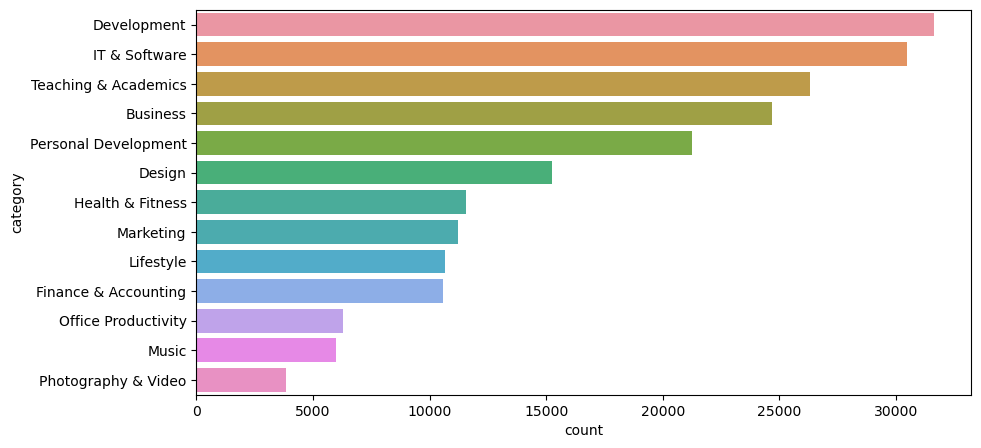

In [12]:
plt.figure(figsize = (10, 5))
category_counts = df_courses.groupby(["category"]).size().reset_index(name="count")
category_counts = category_counts.sort_values(by="count", ascending=False).reset_index(drop = True)
sns.barplot(x = category_counts['count'], y = category_counts['category'])
plt.show()

#### Calculating The Most Popular SubCategories

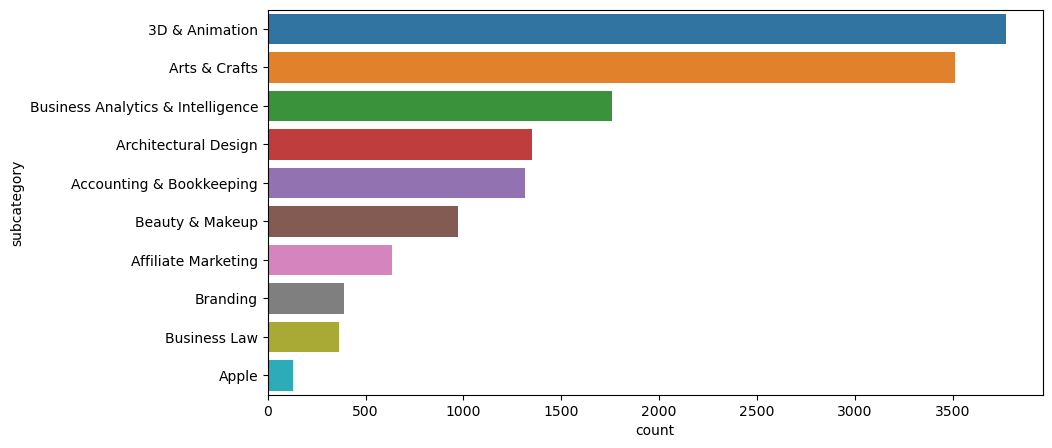

In [13]:
plt.figure(figsize = (10, 5))
category_counts = df_courses.groupby(["subcategory"]).size().reset_index(name="count")[:10]
category_counts = category_counts.sort_values(by="count", ascending=False).reset_index(drop = True)
sns.barplot(x = category_counts['count'], y = category_counts['subcategory'])
plt.show()

---

### 1.1. What is the most Popular Course in each category?

In [14]:
sorted_data = df_courses.sort_values(by="num_subscribers", ascending=False).groupby("category")
popular_courses = sorted_data.head(1)
popular_courses[['title','category', 'num_subscribers']]

,title,category,num_subscribers
396,Java Tutorial for Complete Beginners,Development,1752364
16288,Microsoft Excel - Excel from Beginner to Advanced,Office Productivity,1108811
19303,The Complete Digital Marketing Course - 12 Cou...,Marketing,706339
60269,Ultimate AWS Certified Solutions Architect Ass...,IT & Software,640699
15545,The Complete SQL Bootcamp 2022: Go from Zero t...,Business,574046
19649,Adobe Photoshop CC: A Beginner to Advanced Pho...,Design,510784
19636,Adobe Premiere Pro CC Masterclass: Video Editi...,Photography & Video,436304
24689,English Launch: Learn English for Free - Upgra...,Teaching & Academics,360861
12835,The Complete Financial Analyst Course 2022,Finance & Accounting,356765
4038,Pianoforall - Incredible New Way To Learn Pian...,Music,355854


---

## 2. Pricing Analysis 

### 2.1 What is the distribution of courses price?

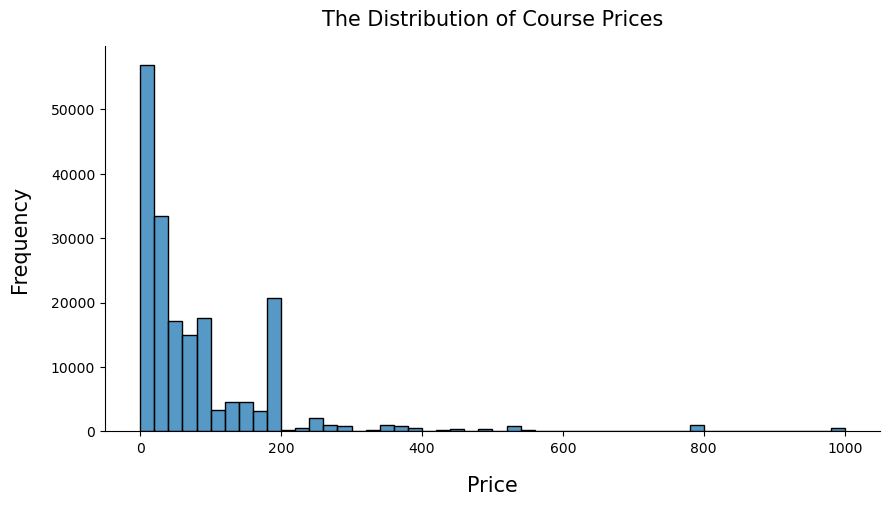

In [15]:
priced_courses = df_courses[df_courses["price"] > 0]

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(data=priced_courses, x="price", bins=50, edgecolor="black", ax=ax)

ax.set_title("The Distribution of Course Prices", fontsize=15, pad=15)
ax.set_xlabel("Price", fontsize=15, labelpad=15)
ax.set_ylabel("Frequency", fontsize=15, labelpad=15)

sns.despine()

plt.show()

> The majority of courses are priced below 200 dollars, with a significant portion of them being offered for free. The number of courses significant decreases when moving past 200 dollars with only a couple of courses further the distribution on the 800 and 1000 dollars.

### 2.2. What is the percetange of courses that are priced below 200$ on udemy?

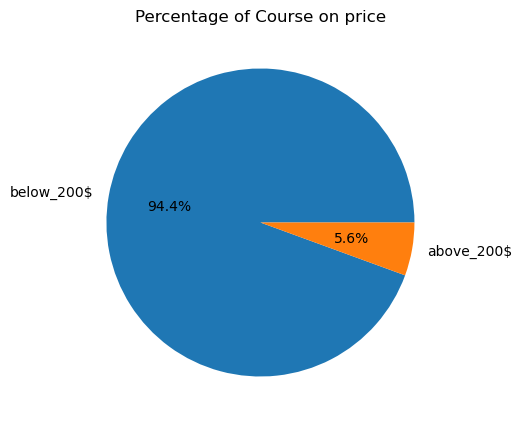

In [16]:
below_200 = len(df_courses[df_courses["price"] < 200])
above_200 = len(df_courses[df_courses["price"] >= 200])
price_dist = [below_200, above_200]
labels = ['below_200$', 'above_200$']

plt.figure(figsize = (10, 5))
plt.pie(price_dist, labels = labels, autopct = '%.1f%%')
plt.title('Percentage of Course on price')
plt.show()

---

## 3. Instructor Performance

### 3.1. Who are the top 10 most performing instructors according to the number of subscribers?

In [17]:
# Grouping the dataframe by instructor name and calculate the total number of subscribers for each instructor
instructor_subscriber_counts = df_courses.groupby("instructor_name")["num_subscribers"].sum()

# Sorting the instructor subscriber counts in descending order
sorted_instructor_subscribers = instructor_subscriber_counts.sort_values(ascending=False)
sorted_instructor_subscribers[:10]

instructor_name
Learn Tech Plus           7910243
TJ Walker                 6427952
Phil Ebiner               5995228
YouAccel Training         5553665
Start-Tech Academy        4853477
Jose Portilla             4196088
Srinidhi Ranganathan      4089031
Laurence Svekis           3492822
Robert (Bob) Steele       3461927
Creative Online School    3357209
Name: num_subscribers, dtype: int32

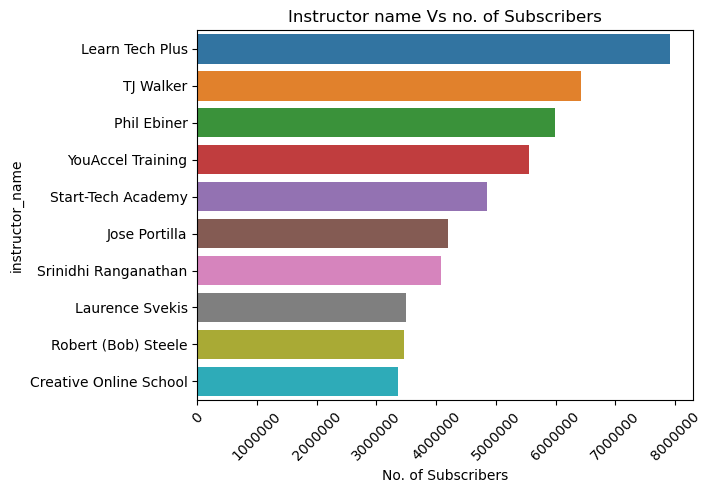

In [18]:
plt.ticklabel_format(style='plain')
sns.barplot(x = sorted_instructor_subscribers[:10].values, y = sorted_instructor_subscribers[:10].index)
plt.xticks(rotation = 45)
plt.title('Instructor name Vs no. of Subscribers')
plt.xlabel('No. of Subscribers')
plt.show()

### 3.2. Who are the top most 5 experienced instructors in terms of (Courses published  on Udemy)?

In [19]:
instructor_experience = df_courses.groupby("instructor_name")["id"].count().reset_index()

instructor_experience = instructor_experience.rename(columns={"id": "num_courses"})

instructor_experience.sort_values("num_courses", ascending=False).reset_index(drop=True)[:5]

,instructor_name,num_courses
0,Packt Publishing,1254
1,Bluelime Learning Solutions,422
2,Illumeo Learning,410
3,Laurence Svekis,327
4,Infinite Skills,323


---

## 4. Time Analysis

### 4.1 How was the growth of Subscribers over Time on Udemy?

In [20]:
# Set the "published_time" column as the index
df_time = df_courses.set_index("published_time")
# Resample the data to a monthly frequency and calculate the sum of subscribers for each month
monthly_subscribers = df_time["num_subscribers"].resample("M").sum()

<Axes: xlabel='published_time'>

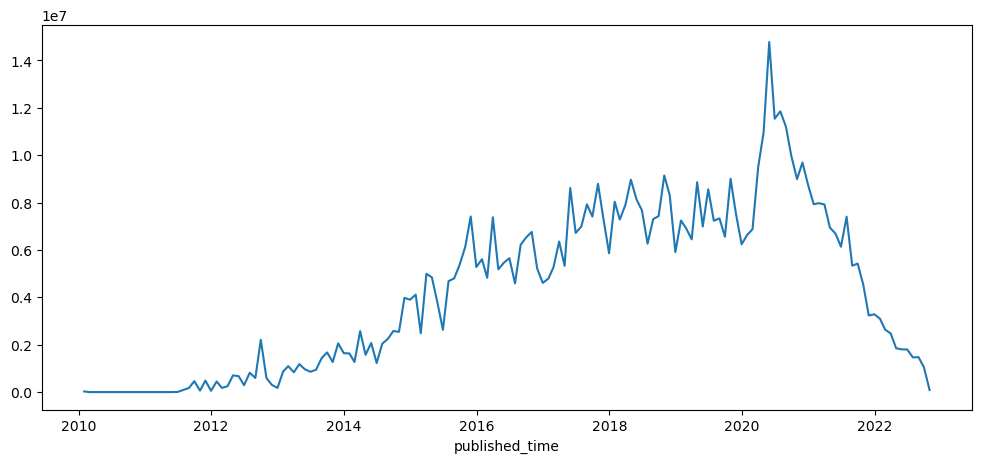

In [21]:
plt.figure(figsize = (12, 5))

df_time = df_courses.set_index("published_time")

monthly_subscribers = df_time["num_subscribers"].resample("M").sum()

sns.lineplot(x=monthly_subscribers.index, y=monthly_subscribers.values)

> The analysis of the subscriber growth trend reveals a consistent upward trajectory starting from early 2013, peaking in 2020, and subsequently experiencing a significant decline in early 2021. This observation highlights a substantial surge in subscriber numbers over the years, followed by a notable contraction in the most recent period.

### 4.2 What was the year that had the most subsribers?

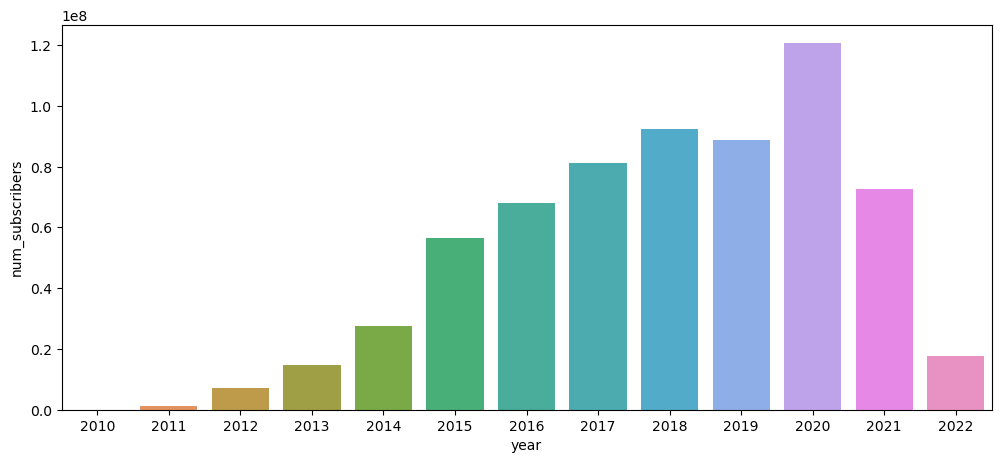

In [22]:
plt.figure(figsize = (12, 5))
df_year = df_courses.copy()
df_year["year"] = df_year["published_time"].dt.year

yearly_subscribers = df_year.groupby("year")["num_subscribers"].sum().reset_index() 

sns.barplot(x=yearly_subscribers["year"], y=yearly_subscribers["num_subscribers"])
plt.show()

<Axes: >

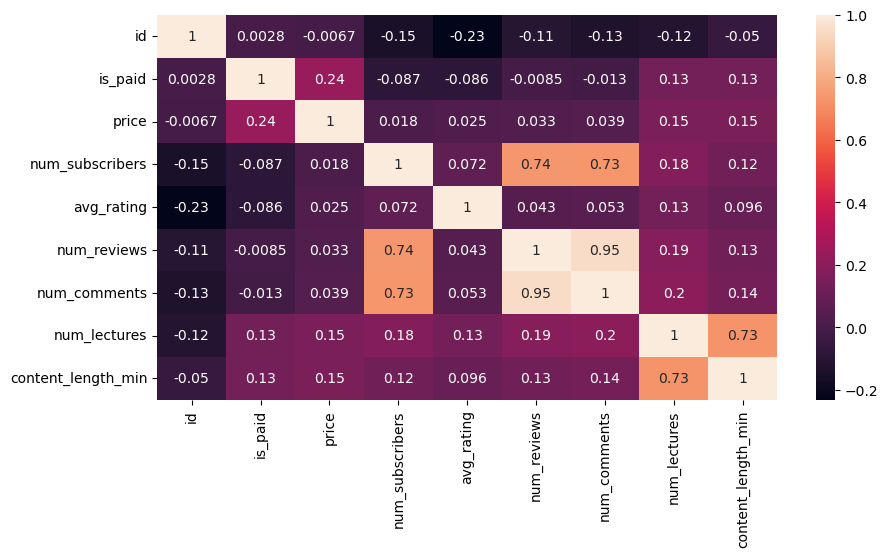

In [27]:
plt.figure(figsize = (10, 5))
sns.heatmap(df_courses.corr(), annot = True)

# Conclusion

The analysis of the Udemy Courses Comments dataset highlights key insights. IT & Software, Development, Teaching & Academics, Personal Development, and Business emerged as popular course categories. Subcategories like Other IT & Web Development, IT Certifications, Language Learning, and Programming Languages also gained traction. 

The "Java Tutorial for Complete Beginners" course in the Development category had the highest number of subscribers (1,752,367).

Approximately 94.4% of courses are priced below 200 dollars, indicating affordability and accessibility. Top-performing instructors by subscriber count include Learn Tech Plus, TJ Walker, Phil Ebiner, YouAccel Tanning, and Star-Tech Academy. 

In terms of experience, Packet Publishing, Bluelime Learning Solutions, lllumeo Learning, Laurence Svekis, and Infinite Skills published the most courses.

The time analysis reveals consistent subscriber growth, peaking in 2020 but declining in early 2021. Notably, 2020 had the highest number of subscribers, with approximately 120,730,813 users.

These findings showcase the popularity of online learning, the diversity of course categories, and the influence of pricing, instructor performance, and temporal trends on user engagement. 

These insights provide valuable information for Udemy and its stakeholders, emphasizing the platform's impact in facilitating accessible education and fostering a thriving online learning community.


## Findings Summary

1. IT & software, Development, Teaching & Academics, Personal Development and Business are the most popular courses categories on Udemy.


2. Other IT &, Web Development, IT Certifications, Language Learning and Programming Languages are the most popular courses subcategories on Udemy.


3. Java Tutorial for Complete Beginners in the Development category in the most popular course in Udemy with 1,752,367 subscribers on Udemy.


4. About 94.4% of courses are priced below 200 dollars.


5. Learn Tech Plus, TJ Walker, Phil Ebiner, YouAccel Tanning and Star-Tech Academy are the topmost 5 performing instructors by subscribers on Udemy.


6. Packet Publishing, Bluelime Learning Soultions, lllumeo Learning, Laurence Svekis and Infinite Skills are the top 5 most experienced instructors in term of number of courses published on Udemy. 


7. There is a consistent upward trajectory starting from early 2013, peaking in 2020, and subsequently experiencing a significant decline in early 2021.


8. Year 2020 is the year that Udemy got the most subscribers in, about 120,730,813 users subscribed that year.

# Recommendations for Udemy Stakeholders 

- Capitalize on the popularity of IT & Software, Development, Teaching & Academics, Personal Development, and Business categories by investing in targeted marketing campaigns to attract more learners to these high-demand courses.

- Collaborate with instructors who have excelled in delivering courses in the most popular subcategories, such as Other IT & Web Development, IT Certifications, Language Learning, and Programming Languages, to create specialized programs and further expand the course offerings in these areas.

- Analyze the pricing structure of courses priced below 200 dollars, which constitute the majority of courses, to ensure optimal revenue generation while maintaining affordability. Consider introducing pricing tiers or bundles to encourage learners to enroll in multiple courses.

- Recognize and incentivize top-performing instructors, such as Learn Tech Plus, TJ Walker, Phil Ebiner, YouAccel Tanning, and Star-Tech Academy, by offering them opportunities to create exclusive content, collaborate on promotional activities, or participate in instructor development programs to further enhance the quality and reputation of the platform.

- Capitalize on the strong growth observed in 2020, the year with the highest number of subscribers, by leveraging the marketing strategies and content trends that contributed to this success. Additionally, closely monitor the decline in early 2021 and investigate potential factors that may have impacted subscriber growth to devise strategies for recovery.